In [31]:
import numpy as np # array operations
import cv2 #opencv library read img operations
import os # use directory & join path
from pathlib import Path # 去掉副檔名

# data visualisation and manipulation
import matplotlib.pyplot as plt #show img and table

if __name__ == '__main__':

    # weight_r, weight_g, weight_b = input("Enter 3 channel weight_red , weight_green, weight_blue(0.0 ≤ w ≤ 1.0):").split()
    # weight_r = float(weight_r)
    # weight_g = float(weight_g)
    # weight_b = float(weight_b)

    global src_rgb

    # 印出所有圖片
    DATASRC = 'source/'
    DATATRG = 'encrypt/'

    # 抓目錄下所有圖檔檔名
    src_name = os.listdir(DATASRC)

    for i in range (len(src_name)):
            
        # 圖片完整路徑
        src_path = DATASRC + src_name[i]
        src_bgr = cv2.imread(src_path ,cv2.IMREAD_COLOR)   
        print(src_bgr.type())
        
        # 原為 BGR 轉為 RGB
        src_rgb = cv2.cvtColor(src_bgr,cv2.COLOR_BGR2RGB)
        
        # 去掉副檔名
        src_name_temp= Path(src_path).stem

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [ ]:
import cv2 #opencv library read img operations

a=cv2.imread("1.jpg",-1)

a.channels()==1

AttributeError: 'numpy.ndarray' object has no attribute 'channels'

In [ ]:
decimal_number = int(input("Enter a decimal number: "))

# Convert decimal to binary
binary_list = []
while decimal_number > 0:
    remainder = decimal_number % 2
    binary_list.append(str(remainder))
    decimal_number //= 2

# Reverse the binary list to get the correct order
binary_list.reverse()

# Join the binary digits and print the result
binary_number = "".join(binary_list)
print("Binary representation:", binary_number)


Binary representation: 10000


In [ ]:
def decimal_to_binary(decimal_number):
    # Convert decimal to binary
    binary_list = []
    while decimal_number > 0:
        remainder = decimal_number % 2
        binary_list.append(remainder)
        decimal_number //= 2
    
    # Reverse the binary list to get the correct order
    binary_list.reverse()
    # Pad the binary list with leading zeros if necessary
    while len(binary_list) < 8:
        binary_list.insert(0, 0)
    # Join the binary digits and return the result
    # binary_number = "".join(binary_list)
    # binary_number = binary_number.zfill(8)

    return binary_list

result = decimal_to_binary(128)
print(result) # prints ['1', '0', '0', '0'] "1010"



[1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(decimal_to_binary(100))
print(decimal_to_binary(108))
print(decimal_to_binary(85))

[0, 1, 1, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 0]
[0, 1, 0, 1, 0, 1, 0, 1]


In [ ]:
print(decimal_to_binary(99))
print(decimal_to_binary(104))
print(decimal_to_binary(82))

[0, 1, 1, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 1, 0]


In [ ]:
import numpy as np
M,N=1016,760
binary_rgb = np.ndarray((M,N,24), dtype=np.uint8)
binary_rgb.shape

(1016, 760, 24)

In [ ]:
import numpy as np

# Define a function to apply
def my_func(x):
    return x[0] + x[1]

# Create a 2D NumPy array
arr = np.array([[[1, 2, 3], [3, 4, 6], [5, 6, 7]],[[1, 2, 3], [0, 1, 2], [2, 1, 0]]])
print(arr.shape)
# print(arr[:,:,0])
# Apply the function along the first axis (i.e., column-wise)
result = np.apply_along_axis(my_func, axis=2, arr=arr)

print(result)


(2, 3, 3)
[[ 3  7 11]
 [ 3  1  3]]


In [68]:
import numpy as np # array operations
import cv2 #opencv library read img operations
import os # use directory & join path
from pathlib import Path # 去掉副檔名

# data visualisation and manipulation
import matplotlib.pyplot as plt #show img and table

def get_mean_and_std(typeStr, img_name, x):
    x_mean, x_std = cv2.meanStdDev(x)
    x_mean = np.hstack(np.around(x_mean,2))
    x_std = np.hstack(np.around(x_std,2))
    
    # 印出平均與標準差
    if(typeStr == 's'):
        print("\n來源圖檔名: ", img_name)
    elif(typeStr == 't'):
        print("\n目標圖檔名: ", img_name)
    
    print("RGB_channel 平均: ", x_mean)
    print("RGB_channel 標準差: ", x_std)
    
    return x_mean, x_std

def color_transfer(src_rgb, tar_rgb, src_name, tar_name, coltra_name, coltra_num, weight_r, weight_g, weight_b):
    
    s_mean, s_std = get_mean_and_std('s', src_name, src_rgb)
    t_mean, t_std = get_mean_and_std('t', tar_name, tar_rgb)
    
    coltra_rgb = np.ndarray(src_rgb.shape, dtype=np.uint8)

    for k in range(0,3):
        x = src_rgb[:,:,k]
        if(k==0):
            # red channel
            x = ((x-s_mean[k])*(((weight_r*t_std[k])+(1-weight_r)*s_std[k])/s_std[k]))+ weight_r*t_mean[k]+(1-weight_r)*s_mean[k]
        elif(k==1):
            # green channel
            x = ((x-s_mean[k])*(((weight_g*t_std[k])+(1-weight_g)*s_std[k])/s_std[k]))+ weight_g*t_mean[k]+(1-weight_g)*s_mean[k]
        elif(k==2):
            # blue channel
            x = ((x-s_mean[k])*(((weight_b*t_std[k])+(1-weight_b)*s_std[k])/s_std[k]))+ weight_b*t_mean[k]+(1-weight_b)*s_mean[k]

        # boundary check 超過邊界拉回在邊界上
        x = np.clip(x, 0, 255)
        coltra_rgb[:,:,k] = x
    
    # 存顏色轉換結果圖
    str_weight = '_' + str(weight_r) + '_' + str(weight_g) + '_' + str(weight_b)
    coltra_bgr = cv2.cvtColor(coltra_rgb,cv2.COLOR_RGB2BGR)
    cv2.imwrite('result/'+ coltra_name + str_weight + '.png', coltra_bgr)
    
    return coltra_rgb, s_mean, s_std, t_mean, t_std

def gcd(a:int, b:int):
    while b:
        a, b = b, a % b
    return a

# def bitLevel(img:np.ndarray):
#     img 
#     return bit

def decimal_to_binary(decimal_number):
    # Convert decimal to binary
    binary_list = []
    while decimal_number > 0:
        remainder = decimal_number % 2
        binary_list.append(remainder)
        decimal_number //= 2
    
    # Reverse the binary list to get the correct order
    binary_list.reverse()

    # Pad the binary list with leading zeros if necessary
    while len(binary_list) < 8:
        binary_list.insert(0, 0)
    return binary_list

if __name__ == '__main__':

    bx, by, bz, rx, ry, rz = input("Enter bx, by, bz, rx, ry, rz: ").split()
    bx = int(bx)
    by = int(by)
    bz = int(bz)
    rx = int(rx)
    ry = int(ry)
    rz = int(rz)

    global src_rgb

    # 印出所有圖片
    DATASRC = 'source/'
    DATATRG = 'encrypt/'

    # 抓目錄下所有圖檔檔名
    src_name = os.listdir(DATASRC)

    for i in range (len(src_name)):
            
        # 圖片完整路徑
        src_path = DATASRC + src_name[i]
        print(src_path)
        # Load the image
        src_bgr = cv2.imread(src_path, cv2.IMREAD_COLOR)
        # Convert the image to grayscale
        src_gray = cv2.cvtColor(src_bgr, cv2.COLOR_BGR2GRAY)
        sub1 = src_bgr[:, :, 0] - src_gray
        sub2 = src_bgr[:, :, 1] - src_gray
        sub3 = src_bgr[:, :, 2] - src_gray
        #判斷sub中的每个值是不是都等於0
        if((sub1 == 0).all() and (sub2 == 0).all() and (sub3 == 0).all()):
            K=8
            print("The image is grayscale")
        else:
            K=24
            print("The image is color")
        
        # 原為 BGR 轉為 RGB
        src_rgb = cv2.cvtColor(src_bgr,cv2.COLOR_BGR2RGB)
        # print(src_rgb)
        # print(src_rgb[0][0].shape)
        # print(src_rgb[0].shape)
        # print(src_rgb[0][0][0])
        # print(src_rgb[0][0][1])
        # print(src_rgb[0][0][2])
        
        # N 為影像之水平像素數量，M 為影像之垂直像素數量
        M, N, C = src_rgb.shape
        print(M,N)
        # 去掉副檔名
        src_name_temp= Path(src_path).stem

        # # inital variable
        cz= rz * (M / gcd(N,M))
        cx= rx * (K / gcd(M,K))
        cy= ry * (N / gcd(K,N))
        print("cx,cy,cz=",cx,cy,cz)

        # # inital transform matrix
        mattix_1 = np.array([[1, bz, 0], [cz, 1+bz*cz, 0], [0, 0, 1]])
        mattix_2 = np.array([[1, 0, 0], [0, 1, bx], [0, cx, 1+bx*cx]])
        mattix_3 = np.array([[1+by*cy, 0, cy], [0, 1, 0], [by, 0, 1]])

        print("matrix_1",mattix_1)
        print("matrix_2",mattix_2)
        print("matrix_3",mattix_3)

        
        # L (5 ≤ L ≤ 1000)，代表加密的次數
        L=5
        binary_rgb = np.ndarray((M,N,K), dtype=np.uint8)
        # for i in range(C):
        #     binary_channel = np.apply_along_axis(decimal_to_binary, 2, src_rgb[:,:,i])
        #     binary_channel = binary_channel.reshape((M, N, -1))
        #     binary_rgb[:,:,i*8:(i+1)*8] = binary_channel

        for m in range(M):
            for n in range(N):
                # Get the BGR values of the pixel
                r, g, b = src_rgb[m, n]
                # Convert each value to binary
                binary_r = decimal_to_binary(r)
                binary_g = decimal_to_binary(g)
                binary_b = decimal_to_binary(b)
                
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                binary_rgb[m, n, 0:8] = binary_r
                if(K==24):
                    binary_rgb[m, n, 8:16] = binary_g
                    binary_rgb[m, n, 16:24] = binary_b


        print(src_rgb[0][1])
        print(binary_rgb[0][1])



source/kodim07.png
The image is color
512 768
cx,cy,cz= 96.0 32.0 2.0
matrix_1 [[1. 1. 0.]
 [2. 3. 0.]
 [0. 0. 1.]]
matrix_2 [[ 1.  0.  0.]
 [ 0.  1.  1.]
 [ 0. 96. 97.]]
matrix_3 [[33.  0. 32.]
 [ 0.  1.  0.]
 [ 1.  0.  1.]]
[99 99 99]
[0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1]


In [ ]:
cx=96
rx=cx/(K / gcd(M,K))
rx

32.0

In [ ]:
cy=1
ry= cy / (N / gcd(K,N))
ry

0.03125

In [39]:
M,N,K

(512, 768, 24)

In [36]:
gcd(K,N)

24

In [40]:
768/24

32.0

In [47]:
# mattix_1.dot([1 ,1 ,1])
a=np.dot(mattix_1,[1 ,1 ,1])
a

array([2., 5., 1.])

In [48]:
np.dot(mattix_2,a)

array([  2.,   6., 577.])

In [51]:
numbers = [2, 6, 577]
N, M, K = 768, 512, 24  # Example values of N, M, K

modulus_list = [n % N for n in numbers] 
print(modulus_list)


[2, 6, 577]


In [65]:
a=mattix_1.dot([1,1,1]).astype(np.int8)
a

array([2, 5, 1], dtype=int8)

In [66]:
binary_rgb[a[0],a[1],a[2]]

1

In [87]:
init_pos=[0+1,0+1,0+1]
print("init_pos",init_pos)
temp_1=mattix_1.dot(init_pos)
print("temp_1=",temp_1)
temp_1=[temp_1[0]%N,temp_1[1]%M,temp_1[2]%K]
print("temp_1=",temp_1)
temp_2=mattix_2.dot([temp_1[0]%N,temp_1[1]%M,temp_1[2]%K])
print("temp_2=",temp_2)
temp_2=[temp_2[0]%N,temp_2[1]%M,temp_2[2]%K]
print("temp_2=",temp_2)
new_pos=mattix_3.dot([temp_2[0]%N,temp_2[1]%M,temp_2[2]%K])
print("new_pos=",new_pos)


init_pos [1, 1, 1]
temp_1= [2. 5. 1.]
temp_1= [2.0, 5.0, 1.0]
temp_2= [  2.   6. 577.]
temp_2= [2.0, 6.0, 1.0]
new_pos= [98.  6.  3.]


In [95]:
init_pos=[0+1,0+1,0+1+1]
temp_1=mattix_1.dot(init_pos)
temp_1=[temp_1[0]%N,temp_1[1]%M,temp_1[2]%K]
temp_2=mattix_2.dot(temp_1)
temp_2=[temp_2[0]%N,temp_2[1]%M,temp_2[2]%K]
new_pos=mattix_3.dot(temp_2)
new_pos=(new_pos-1)
print("init_pos",init_pos)
print("temp_1=",temp_1)
print("temp_2=",temp_2)
print("new_pos=",new_pos)




init_pos [1, 1, 2]
temp_1= [2, 5, 2]
temp_2= [2, 7, 2]
new_pos= [129   6   3]


In [72]:
mattix_2.dot([2 ,5 ,1]).astype(np.int8)

array([ 2,  6, 65], dtype=int8)

In [78]:
(mattix_2.dot([2 ,5 ,1]))

array([  2.,   6., 577.])

In [99]:
import numpy as np # array operations
import cv2 #opencv library read img operations
import os # use directory & join path
from pathlib import Path # 去掉副檔名

# data visualisation and manipulation
import matplotlib.pyplot as plt #show img and table

def get_mean_and_std(typeStr, img_name, x):
    x_mean, x_std = cv2.meanStdDev(x)
    x_mean = np.hstack(np.around(x_mean,2))
    x_std = np.hstack(np.around(x_std,2))
    
    # 印出平均與標準差
    if(typeStr == 's'):
        print("\n來源圖檔名: ", img_name)
    elif(typeStr == 't'):
        print("\n目標圖檔名: ", img_name)
    
    print("RGB_channel 平均: ", x_mean)
    print("RGB_channel 標準差: ", x_std)
    
    return x_mean, x_std

def color_transfer(src_rgb, tar_rgb, src_name, tar_name, coltra_name, coltra_num, weight_r, weight_g, weight_b):
    
    s_mean, s_std = get_mean_and_std('s', src_name, src_rgb)
    t_mean, t_std = get_mean_and_std('t', tar_name, tar_rgb)
    
    coltra_rgb = np.ndarray(src_rgb.shape, dtype=np.uint8)

    for k in range(0,3):
        x = src_rgb[:,:,k]
        if(k==0):
            # red channel
            x = ((x-s_mean[k])*(((weight_r*t_std[k])+(1-weight_r)*s_std[k])/s_std[k]))+ weight_r*t_mean[k]+(1-weight_r)*s_mean[k]
        elif(k==1):
            # green channel
            x = ((x-s_mean[k])*(((weight_g*t_std[k])+(1-weight_g)*s_std[k])/s_std[k]))+ weight_g*t_mean[k]+(1-weight_g)*s_mean[k]
        elif(k==2):
            # blue channel
            x = ((x-s_mean[k])*(((weight_b*t_std[k])+(1-weight_b)*s_std[k])/s_std[k]))+ weight_b*t_mean[k]+(1-weight_b)*s_mean[k]

        # boundary check 超過邊界拉回在邊界上
        x = np.clip(x, 0, 255)
        coltra_rgb[:,:,k] = x
    
    # 存顏色轉換結果圖
    str_weight = '_' + str(weight_r) + '_' + str(weight_g) + '_' + str(weight_b)
    coltra_bgr = cv2.cvtColor(coltra_rgb,cv2.COLOR_RGB2BGR)
    cv2.imwrite('result/'+ coltra_name + str_weight + '.png', coltra_bgr)
    
    return coltra_rgb, s_mean, s_std, t_mean, t_std

def gcd(a:int, b:int):
    while b:
        a, b = b, a % b
    return a

# def bitLevel(img:np.ndarray):
#     img 
#     return bit

def decimal_to_binary(decimal_number):
    # Convert decimal to binary
    binary_list = []
    while decimal_number > 0:
        remainder = decimal_number % 2
        binary_list.append(remainder)
        decimal_number //= 2
    
    # Reverse the binary list to get the correct order
    binary_list.reverse()

    # Pad the binary list with leading zeros if necessary
    while len(binary_list) < 8:
        binary_list.insert(0, 0)
    return binary_list

if __name__ == '__main__':

    bx, by, bz, rx, ry, rz = input("Enter bx, by, bz, rx, ry, rz: ").split()
    bx = int(bx)
    by = int(by)
    bz = int(bz)
    rx = int(rx)
    ry = int(ry)
    rz = int(rz)

    global src_rgb

    # 印出所有圖片
    DATASRC = 'source/'
    DATATRG = 'encrypt/'

    # 抓目錄下所有圖檔檔名
    src_name = os.listdir(DATASRC)

    for i in range (len(src_name)):
            
        # 圖片完整路徑
        src_path = DATASRC + src_name[i]
        print(src_path)
        # Load the image
        src_bgr = cv2.imread(src_path, cv2.IMREAD_COLOR)
        # Convert the image to grayscale
        src_gray = cv2.cvtColor(src_bgr, cv2.COLOR_BGR2GRAY)
        sub1 = src_bgr[:, :, 0] - src_gray
        sub2 = src_bgr[:, :, 1] - src_gray
        sub3 = src_bgr[:, :, 2] - src_gray
        #判斷sub中的每个值是不是都等於0
        if((sub1 == 0).all() and (sub2 == 0).all() and (sub3 == 0).all()):
            K=8
            print("The image is grayscale")
        else:
            K=24
            print("The image is color")
        
        # 原為 BGR 轉為 RGB
        src_rgb = cv2.cvtColor(src_bgr,cv2.COLOR_BGR2RGB)
        # print(src_rgb)
        # print(src_rgb[0][0].shape)
        # print(src_rgb[0].shape)
        # print(src_rgb[0][0][0])
        # print(src_rgb[0][0][1])
        # print(src_rgb[0][0][2])
        
        # N 為影像之水平像素數量，M 為影像之垂直像素數量
        M, N, C = src_rgb.shape
        # 去掉副檔名
        src_name_temp= Path(src_path).stem

        # # inital variable
        cz= rz * (M / gcd(N,M))
        cx= rx * (K / gcd(M,K))
        cy= ry * (N / gcd(K,N))

        # inital transform matrix
        mattix_1 = np.array([[1, bz, 0], [cz, 1+bz*cz, 0], [0, 0, 1]]).astype(np.int8)
        mattix_2 = np.array([[1, 0, 0], [0, 1, bx], [0, cx, 1+bx*cx]]).astype(np.int8)
        mattix_3 = np.array([[1+by*cy, 0, cy], [0, 1, 0], [by, 0, 1]]).astype(np.int8)

        # L (5 ≤ L ≤ 1000)，代表加密的次數
        L=5
        binary_rgb = np.ndarray((M,N,K), dtype=np.uint8)
        # for i in range(C):
        #     binary_channel = np.apply_along_axis(decimal_to_binary, 2, src_rgb[:,:,i])
        #     binary_channel = binary_channel.reshape((M, N, -1))
        #     binary_rgb[:,:,i*8:(i+1)*8] = binary_channel

        for m in range(M):
            for n in range(N):
                # Get the BGR values of the pixel
                r, g, b = src_rgb[m, n]
                # Convert each value to binary
                binary_r = decimal_to_binary(r)
                binary_g = decimal_to_binary(g)
                binary_b = decimal_to_binary(b)
                
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                binary_rgb[m, n, 0:8] = binary_r
                if(K==24):
                    binary_rgb[m, n, 8:16] = binary_g
                    binary_rgb[m, n, 16:24] = binary_b
        enc_rgb = np.ndarray(binary_rgb.shape, dtype=np.uint8)
        
        for n in range(N):
            for m in range(M):
                for k in range(K):
                    # init_pos=[(n+1)%N,(m+1)%M,(k+1)%K]
                    init_pos=[n+1,m+1,k+1]
                    # print("init_pos",init_pos)
                    temp_1=mattix_1.dot(init_pos)
                    temp_1=[temp_1[0]%N,temp_1[1]%M,temp_1[2]%K]
                    temp_2=mattix_2.dot(temp_1)
                    temp_2=[temp_2[0]%N,temp_2[1]%M,temp_2[2]%K]
                    new_pos=mattix_3.dot(temp_2)
                    new_pos=[new_pos[0]%N,new_pos[1]%M,new_pos[2]%K]
                    # new_pos=(new_pos-1)
                    # init_pos=(init_pos-1)
                    print("new_pos=",new_pos)
                    # enc_rgb[new_pos[0],new_pos[1],new_pos[2]]=binary_rgb[init_pos[0],init_pos[1],init_pos[2]]

source/kodim07.png
The image is color
new_pos= [98, 6, 3]
new_pos= [130, 7, 4]
new_pos= [162, 8, 5]
new_pos= [194, 9, 6]
new_pos= [226, 10, 7]
new_pos= [258, 11, 8]
new_pos= [290, 12, 9]
new_pos= [322, 13, 10]
new_pos= [354, 14, 11]
new_pos= [386, 15, 12]
new_pos= [418, 16, 13]
new_pos= [450, 17, 14]
new_pos= [482, 18, 15]
new_pos= [514, 19, 16]
new_pos= [546, 20, 17]
new_pos= [578, 21, 18]
new_pos= [610, 22, 19]
new_pos= [642, 23, 20]
new_pos= [674, 24, 21]
new_pos= [706, 25, 22]
new_pos= [738, 26, 23]
new_pos= [2, 27, 0]
new_pos= [34, 28, 1]
new_pos= [66, 5, 2]
new_pos= [131, 9, 4]
new_pos= [163, 10, 5]
new_pos= [195, 11, 6]
new_pos= [227, 12, 7]
new_pos= [259, 13, 8]
new_pos= [291, 14, 9]
new_pos= [323, 15, 10]
new_pos= [355, 16, 11]
new_pos= [387, 17, 12]
new_pos= [419, 18, 13]
new_pos= [451, 19, 14]
new_pos= [483, 20, 15]
new_pos= [515, 21, 16]
new_pos= [547, 22, 17]
new_pos= [579, 23, 18]
new_pos= [611, 24, 19]
new_pos= [643, 25, 20]
new_pos= [675, 26, 21]
new_pos= [707, 27, 22]


KeyboardInterrupt: 

In [111]:
def binary_to_decimal(binary_array):
    # Convert binary array to string
    binary_string = ''.join(str(bit) for bit in binary_array)
    decimal_number = 0
    binary_digits = str(binary_string)
    print(binary_digits)
    # reverse the digit ex. 1 1 0 0 >> 0 0 1 1
    binary_digits = binary_digits[::-1]
    print(binary_digits)
    for i in range(len(binary_digits)):
        if binary_digits[i] == '1':
            decimal_number += 2**i
    return decimal_number
# binary_to_decimal("01100100")
binary_to_decimal([0, 1, 1, 0, 0, 1, 0, 0])


01100100
00100110


100

In [105]:
a=[0, 1, 1, 0, 0, 1, 0, 0]
str(a[0:8])
# binary_to_decimal("01100100")

'[0, 1, 1, 0, 0, 1, 0, 0]'

In [115]:
import numpy as np # array operations
import cv2 #opencv library read img operations
import os # use directory & join path
from pathlib import Path # 去掉副檔名

def gcd(a:int, b:int):
    while b:
        a, b = b, a % b
    return a

# def bitLevel(img:np.ndarray):
#     img 
#     return bit

def decimal_to_binary(decimal_number:int):
    # Convert decimal to binary
    binary_list = []
    while decimal_number > 0:
        remainder = decimal_number % 2
        binary_list.append(remainder)
        decimal_number //= 2
    
    # Reverse the binary list to get the correct order
    binary_list.reverse()

    # Pad the binary list with leading zeros if necessary
    while len(binary_list) < 8:
        binary_list.insert(0, 0)
    return binary_list

def binary_to_decimal(binary_array):
    # Convert binary array to string
    binary_string = ''.join(str(bit) for bit in binary_array)
    decimal_number = 0
    binary_digits = str(binary_string)
    # reverse the digit ex. 1 1 0 0 >> 0 0 1 1
    binary_digits = binary_digits[::-1]
    for i in range(len(binary_digits)):
        if binary_digits[i] == '1':
            decimal_number += 2**i
    return decimal_number
# binary_to_decimal([0, 1, 1, 0, 0, 1, 0, 0])

if __name__ == '__main__':

    bx, by, bz, rx, ry, rz = input("Enter bx, by, bz, rx, ry, rz: ").split()
    bx = int(bx)
    by = int(by)
    bz = int(bz)
    rx = int(rx)
    ry = int(ry)
    rz = int(rz)

    global src_rgb

    # 印出所有圖片
    DATASRC = 'source/'
    DATATRG = 'encrypt/'

    # 抓目錄下所有圖檔檔名
    src_name = os.listdir(DATASRC)

    for i in range (len(src_name)):
            
        # 圖片完整路徑
        src_path = DATASRC + src_name[i]
        print(src_path)
        # Load the image
        src_dec_bgr = cv2.imread(src_path, cv2.IMREAD_COLOR)
        # Convert the image to grayscale
        src_dec_gray = cv2.cvtColor(src_dec_bgr, cv2.COLOR_BGR2GRAY)
        sub1 = src_dec_bgr[:, :, 0] - src_dec_gray
        sub2 = src_dec_bgr[:, :, 1] - src_dec_gray
        sub3 = src_dec_bgr[:, :, 2] - src_dec_gray
        #判斷sub中的每个值是不是都等於0
        if((sub1 == 0).all() and (sub2 == 0).all() and (sub3 == 0).all()):
            K=8
            print("The image is grayscale")
        else:
            K=24
            print("The image is color")
        
        # 原為 BGR 轉為 RGB
        src_dec_rgb = cv2.cvtColor(src_dec_bgr,cv2.COLOR_BGR2RGB)
        # print(src_dec_rgb)
        # print(src_dec_rgb[0][0].shape)
        # print(src_dec_rgb[0].shape)
        # print(src_dec_rgb[0][0][0])
        # print(src_dec_rgb[0][0][1])
        # print(src_dec_rgb[0][0][2])
        
        # N 為影像之水平像素數量，M 為影像之垂直像素數量
        M, N, C = src_dec_rgb.shape
        print(M,N)
        # 去掉副檔名
        src_name_temp= Path(src_path).stem

        # # inital variable
        cz= rz * (M / gcd(N,M))
        cx= rx * (K / gcd(M,K))
        cy= ry * (N / gcd(K,N))
        print("cx,cy,cz=",cx,cy,cz)

        # inital transform matrix
        mattix_1 = np.array([[1, bz, 0], [cz, 1+bz*cz, 0], [0, 0, 1]]).astype(np.int8)
        mattix_2 = np.array([[1, 0, 0], [0, 1, bx], [0, cx, 1+bx*cx]]).astype(np.int8)
        mattix_3 = np.array([[1+by*cy, 0, cy], [0, 1, 0], [by, 0, 1]]).astype(np.int8)

        print("matrix_1",mattix_1)
        print("matrix_2",mattix_2)
        print("matrix_3",mattix_3)

        
        # L (5 ≤ L ≤ 1000)，代表加密的次數
        L=5
        src_binary_rgb = np.ndarray((M,N,K), dtype=np.uint8)
        # for i in range(C):
        #     binary_channel = np.apply_along_axis(decimal_to_binary, 2, src_rgb[:,:,i])
        #     binary_channel = binary_channel.reshape((M, N, -1))
        #     binary_rgb[:,:,i*8:(i+1)*8] = binary_channel

        for m in range(M):
            for n in range(N):
                # Get the BGR values of the pixel
                r, g, b = src_dec_rgb[m, n]
                # Convert each value to binary
                binary_r = decimal_to_binary(r)
                binary_g = decimal_to_binary(g)
                binary_b = decimal_to_binary(b)
                
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                src_binary_rgb[m, n, 0:8] = binary_r
                if(K==24):
                    src_binary_rgb[m, n, 8:16] = binary_g
                    src_binary_rgb[m, n, 16:24] = binary_b

        print(src_dec_rgb[0][1])
        print(src_binary_rgb[0][1])

        enc_binary_rgb = np.ndarray(src_binary_rgb.shape, dtype=np.uint8)
        
        # for l in range(L):
        for n in range(N):
            for m in range(M):
                for k in range(K):
                    # init_pos=[(n+1)%N,(m+1)%M,(k+1)%K]
                    init_pos=[n+1,m+1,k+1]
                    # print("init_pos",init_pos)
                    temp_1=mattix_1.dot(init_pos)
                    temp_1=[temp_1[0]%N,temp_1[1]%M,temp_1[2]%K]
                    temp_2=mattix_2.dot(temp_1)
                    temp_2=[temp_2[0]%N,temp_2[1]%M,temp_2[2]%K]
                    new_pos=mattix_3.dot(temp_2)
                    new_pos=[new_pos[0]%N,new_pos[1]%M,new_pos[2]%K]
                    enc_binary_rgb[new_pos[1]-1,new_pos[0]-1,new_pos[2]-1]=src_binary_rgb[init_pos[1]-1,init_pos[0]-1,init_pos[2]-1]

        enc_dec_rgb = np.ndarray(src_dec_rgb.shape, dtype=np.uint8)
        for m in range(M):
            for n in range(N):
                # Convert each value to decimal
                dec_r = binary_to_decimal(enc_binary_rgb[m, n, 0:8])
                if(K==24):
                    dec_g = binary_to_decimal(enc_binary_rgb[m, n, 8:16])
                    dec_b = binary_to_decimal(enc_binary_rgb[m, n, 16:24])
                # print(dec_r,dec_g,dec_b)
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                if(K==24):src_dec_rgb[m, n]=[dec_b,dec_g,dec_r]
                else:src_dec_rgb[m, n]=[dec_r,dec_r,dec_r]
                # if(K==24):
                #     src_dec_rgb[m, n, 0] = dec_r
                #     src_binary_rgb[m, n, 1] = dec_g
                #     src_binary_rgb[m, n, 2] = dec_b
                # else:
                #     src_dec_rgb[m, n, 0] = dec_r
                #     src_binary_rgb[m, n, 1] = dec_r
                #     src_binary_rgb[m, n, 2] = dec_r
        print("src_dec_rgb=",src_dec_rgb)
        # 存顏色轉換結果圖
        # enc_dec_bgr = cv2.cvtColor(enc_dec_rgb,cv2.COLOR_RGB2BGR)
        cv2.imwrite( DATATRG + '0'+ str(i+1)+ '_' + src_name_temp + '_enc.png', src_dec_rgb)

source/kodim07.png
The image is color
512 768
cx,cy,cz= 96.0 32.0 2.0
matrix_1 [[1 1 0]
 [2 3 0]
 [0 0 1]]
matrix_2 [[ 1  0  0]
 [ 0  1  1]
 [ 0 96 97]]
matrix_3 [[33  0 32]
 [ 0  1  0]
 [ 1  0  1]]
[99 99 99]
[0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1]
src_dec_rgb= [[[ 26 165 190]
  [ 26  10  48]
  [238  27 104]
  ...
  [ 37   5   1]
  [ 90  54  24]
  [195 123 253]]

 [[170  46 175]
  [ 88  73  80]
  [174 155  72]
  ...
  [  1  68  37]
  [ 86 114  14]
  [193 216 236]]

 [[169  41 171]
  [137  77 208]
  [142 155  41]
  ...
  [  5 108  21]
  [ 78  23   6]
  [194 181 173]]

 ...

 [[ 41  11  31]
  [216  78  85]
  [164  25  41]
  ...
  [112 232  48]
  [116 214  96]
  [230 184 195]]

 [[169 135 154]
  [120 143  53]
  [230  27  72]
  ...
  [ 89  29  37]
  [ 84 116  94]
  [226 144 255]]

 [[  9 173 155]
  [ 91  77  48]
  [230 123  45]
  ...
  [ 17   1  49]
  [ 76 180  92]
  [192  22 250]]]


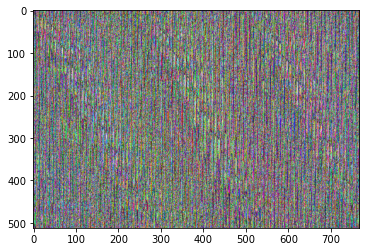

In [113]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Show image
plt.imshow(src_dec_rgb)
plt.show()

In [114]:
cv2.imwrite("output.png", src_dec_rgb)

True

In [ ]:
cv2.imwrite( DATATRG + '0'+ str(i+1)+ '_' + src_name_temp + '_enc.png', enc_dec_rgb)

In [132]:
import numpy as np # array operations
import cv2 #opencv library read img operations
import os # use directory & join path
from pathlib import Path # 去掉副檔名

def gcd(a:int, b:int):
    while b:
        a, b = b, a % b
    return a

# def bitLevel(img:np.ndarray):
#     img 
#     return bit

def decimal_to_binary(decimal_number:int):
    # Convert decimal to binary
    binary_list = []
    while decimal_number > 0:
        remainder = decimal_number % 2
        binary_list.append(remainder)
        decimal_number //= 2
    
    # Reverse the binary list to get the correct order
    binary_list.reverse()

    # Pad the binary list with leading zeros if necessary
    while len(binary_list) < 8:
        binary_list.insert(0, 0)
    return binary_list

def binary_to_decimal(binary_array):
    # Convert binary array to string
    binary_string = ''.join(str(bit) for bit in binary_array)
    decimal_number = 0
    binary_digits = str(binary_string)
    # reverse the digit ex. 1 1 0 0 >> 0 0 1 1
    binary_digits = binary_digits[::-1]
    for i in range(len(binary_digits)):
        if binary_digits[i] == '1':
            decimal_number += 2**i
    return decimal_number
# binary_to_decimal([0, 1, 1, 0, 0, 1, 0, 0])

if __name__ == '__main__':

    bx, by, bz, rx, ry, rz = input("Enter bx, by, bz, rx, ry, rz: ").split()
    bx = int(bx)
    by = int(by)
    bz = int(bz)
    rx = int(rx)
    ry = int(ry)
    rz = int(rz)

    global src_rgb

    # 印出所有圖片
    DATASRC = 'encrypt/'
    DATATRG = 'decryp/'

    # 抓目錄下所有圖檔檔名
    src_name = os.listdir(DATASRC)

    for i in range (len(src_name)):
            
        # 圖片完整路徑
        src_path = DATASRC + src_name[i]
        print(src_path)
        # Load the image
        src_dec_bgr = cv2.imread(src_path, cv2.IMREAD_COLOR)
        src_dec_rgb = cv2.cvtColor(src_dec_bgr,cv2.COLOR_BGR2RGB)
        # print(src_dec_rgb)
        # N 為影像之水平像素數量，M 為影像之垂直像素數量
        M, N, C = src_dec_rgb.shape
        
        # Convert the image to grayscale
        src_dec_gray = cv2.cvtColor(src_dec_bgr, cv2.COLOR_BGR2GRAY)
        sub1 = src_dec_bgr[:, :, 0] - src_dec_gray
        sub2 = src_dec_bgr[:, :, 1] - src_dec_gray
        sub3 = src_dec_bgr[:, :, 2] - src_dec_gray
        #判斷sub中的每个值是不是都等於0
        if((sub1 == 0).all() and (sub2 == 0).all() and (sub3 == 0).all()):
            K=8
            print("The image is grayscale")
        else:
            K=24
            print("The image is color")

        src_binary_rgb = np.ndarray((M,N,K), dtype=np.uint8)
        for m in range(M):
            for n in range(N):
                # Get the BGR values of the pixel
                r, g, b = src_dec_rgb[m, n]
                # Convert each value to binary
                binary_r = decimal_to_binary(r)
                binary_g = decimal_to_binary(g)
                binary_b = decimal_to_binary(b)
                
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                src_binary_rgb[m, n, 0:8] = binary_r
                if(K==24):
                    src_binary_rgb[m, n, 8:16] = binary_g
                    src_binary_rgb[m, n, 16:24] = binary_b

        # inital variable
        cz = rz * (M / gcd(N,M))
        cx = rx * (K / gcd(M,K))
        cy = ry * (N / gcd(K,N))
        L=5

        dec_binary_rgb = np.ndarray(src_binary_rgb.shape, dtype=np.uint8)
        # for l in range(L):
        for n in range(N):
            for m in range(M):
                for k in range(K):
                    init_pos = [n+1,m+1,k+1]
                    temp_1 = np.array(init_pos , dtype=np.int8)
                    temp_1[0] = (init_pos[0]-cy*init_pos[2]) % N
                    temp_1[2] = (init_pos[2]-by*temp_1[0]) % K
                    temp_2 = np.array(temp_1 , dtype=np.int8)
                    temp_2[2] = (temp_1[2] - cx * temp_1[1]) % K
                    temp_2[0] = (temp_1[1] - bx * temp_2[2]) % M
                    new_pos = np.array(temp_2 , dtype=np.int8)
                    new_pos[1] = (temp_2[1] - cz * temp_2[0]) % M
                    new_pos[0] = (temp_2[0] - bz * new_pos[1]) % M
                    new_pos
                    dec_binary_rgb[new_pos[1]-1,new_pos[0]-1,new_pos[2]-1]=src_binary_rgb[init_pos[1]-1,init_pos[0]-1,init_pos[2]-1]

        enc_dec_rgb = np.ndarray(src_dec_rgb.shape, dtype=np.uint8)
        for m in range(M):
            for n in range(N):
                # Convert each value to decimal
                dec_r = binary_to_decimal(dec_binary_rgb[m, n, 0:8])
                if(K==24):
                    dec_g = binary_to_decimal(dec_binary_rgb[m, n, 8:16])
                    dec_b = binary_to_decimal(dec_binary_rgb[m, n, 16:24])
                # print(dec_r,dec_g,dec_b)
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                if(K==24):enc_dec_rgb[m, n]=[dec_r,dec_g,dec_b]
                else:enc_dec_rgb[m, n]=[dec_r,dec_r,dec_r]

        # 去掉副檔名
        src_name_temp= Path(src_path).stem
        src_name_temp=src_name_temp.rstrip("enc")
        # 存顏色轉換結果圖
        enc_dec_bgr = cv2.cvtColor(enc_dec_rgb,cv2.COLOR_RGB2BGR)
        cv2.imwrite( DATATRG + src_name_temp + 'dec.png', enc_dec_bgr)


encrypt/01_kodim07_enc.png
The image is color
encrypt/02_Tank_enc.png
The image is grayscale


In [131]:
# 去掉副檔名
src_name_temp= Path(src_path).stem
src_name_temp=src_name_temp.rstrip("enc")
# 存顏色轉換結果圖
enc_dec_bgr = cv2.cvtColor(enc_dec_rgb,cv2.COLOR_RGB2BGR)
cv2.imwrite( DATATRG + src_name_temp + 'dec.png', src_dec_bgr)

True

In [130]:
src_dec_bgr

array([[[ 26, 165, 190],
        [ 26,  10,  48],
        [238,  27, 104],
        ...,
        [ 37,   5,   1],
        [ 90,  54,  24],
        [195, 123, 253]],

       [[170,  46, 175],
        [ 88,  73,  80],
        [174, 155,  72],
        ...,
        [  1,  68,  37],
        [ 86, 114,  14],
        [193, 216, 236]],

       [[169,  41, 171],
        [137,  77, 208],
        [142, 155,  41],
        ...,
        [  5, 108,  21],
        [ 78,  23,   6],
        [194, 181, 173]],

       ...,

       [[ 41,  11,  31],
        [216,  78,  85],
        [164,  25,  41],
        ...,
        [112, 232,  48],
        [116, 214,  96],
        [230, 184, 195]],

       [[169, 135, 154],
        [120, 143,  53],
        [230,  27,  72],
        ...,
        [ 89,  29,  37],
        [ 84, 116,  94],
        [226, 144, 255]],

       [[  9, 173, 155],
        [ 91,  77,  48],
        [230, 123,  45],
        ...,
        [ 17,   1,  49],
        [ 76, 180,  92],
        [192,  22, 250]]

In [125]:
new_pos

array([0, 0, 0], dtype=int8)

In [126]:
init_pos

[768, 512, 24]

In [133]:
import numpy as np # array operations
import cv2 #opencv library read img operations
import os # use directory & join path
from pathlib import Path # 去掉副檔名

def gcd(a:int, b:int):
    while b:
        a, b = b, a % b
    return a

# def bitLevel(img:np.ndarray):
#     img 
#     return bit

def decimal_to_binary(decimal_number:int):
    # Convert decimal to binary
    binary_list = []
    while decimal_number > 0:
        remainder = decimal_number % 2
        binary_list.append(remainder)
        decimal_number //= 2
    
    # Reverse the binary list to get the correct order
    binary_list.reverse()

    # Pad the binary list with leading zeros if necessary
    while len(binary_list) < 8:
        binary_list.insert(0, 0)
    return binary_list

def binary_to_decimal(binary_array):
    # Convert binary array to string
    binary_string = ''.join(str(bit) for bit in binary_array)
    decimal_number = 0
    binary_digits = str(binary_string)
    # reverse the digit ex. 1 1 0 0 >> 0 0 1 1
    binary_digits = binary_digits[::-1]
    for i in range(len(binary_digits)):
        if binary_digits[i] == '1':
            decimal_number += 2**i
    return decimal_number
# binary_to_decimal([0, 1, 1, 0, 0, 1, 0, 0])

if __name__ == '__main__':

    bx, by, bz, rx, ry, rz = input("Enter bx, by, bz, rx, ry, rz: ").split()
    bx = int(bx)
    by = int(by)
    bz = int(bz)
    rx = int(rx)
    ry = int(ry)
    rz = int(rz)

    global src_rgb

    # 印出所有圖片
    DATASRC = 'encrypt/'
    DATATRG = 'decryp/'

    # 抓目錄下所有圖檔檔名
    src_name = os.listdir(DATASRC)

    for i in range (len(src_name)):
            
        # 圖片完整路徑
        src_path = DATASRC + src_name[i]
        print(src_path)
        # Load the image
        src_dec_bgr = cv2.imread(src_path, cv2.IMREAD_COLOR)
        src_dec_rgb = cv2.cvtColor(src_dec_bgr,cv2.COLOR_BGR2RGB)
        # print(src_dec_rgb)
        # N 為影像之水平像素數量，M 為影像之垂直像素數量
        M, N, C = src_dec_rgb.shape
        
        # Convert the image to grayscale
        src_dec_gray = cv2.cvtColor(src_dec_bgr, cv2.COLOR_BGR2GRAY)
        sub1 = src_dec_bgr[:, :, 0] - src_dec_gray
        sub2 = src_dec_bgr[:, :, 1] - src_dec_gray
        sub3 = src_dec_bgr[:, :, 2] - src_dec_gray
        #判斷sub中的每个值是不是都等於0
        if((sub1 == 0).all() and (sub2 == 0).all() and (sub3 == 0).all()):
            K=8
            print("The image is grayscale")
        else:
            K=24
            print("The image is color")

        src_binary_rgb = np.ndarray((M,N,K), dtype=np.uint8)
        for m in range(M):
            for n in range(N):
                # Get the BGR values of the pixel
                r, g, b = src_dec_rgb[m, n]
                # Convert each value to binary
                binary_r = decimal_to_binary(r)
                binary_g = decimal_to_binary(g)
                binary_b = decimal_to_binary(b)
                
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                src_binary_rgb[m, n, 0:8] = binary_r
                if(K==24):
                    src_binary_rgb[m, n, 8:16] = binary_g
                    src_binary_rgb[m, n, 16:24] = binary_b

        # inital variable
        cz = rz * (M / gcd(N,M))
        cx = rx * (K / gcd(M,K))
        cy = ry * (N / gcd(K,N))
        L=5

        dec_binary_rgb = np.ndarray(src_binary_rgb.shape, dtype=np.uint8)
        for l in range(L):
            for n in range(N):
                for m in range(M):
                    for k in range(K):
                        init_pos = [n+1,m+1,k+1]
                        temp_1 = np.array(init_pos , dtype=np.int8)
                        temp_1[0] = (init_pos[0]-cy*init_pos[2]) % N
                        temp_1[2] = (init_pos[2]-by*temp_1[0]) % K
                        temp_2 = np.array(temp_1 , dtype=np.int8)
                        temp_2[2] = (temp_1[2] - cx * temp_1[1]) % K
                        temp_2[0] = (temp_1[1] - bx * temp_2[2]) % M
                        new_pos = np.array(temp_2 , dtype=np.int8)
                        new_pos[1] = (temp_2[1] - cz * temp_2[0]) % M
                        new_pos[0] = (temp_2[0] - bz * new_pos[1]) % M
                        dec_binary_rgb[new_pos[1]-1,new_pos[0]-1,new_pos[2]-1]=src_binary_rgb[init_pos[1]-1,init_pos[0]-1,init_pos[2]-1]

        enc_dec_rgb = np.ndarray(src_dec_rgb.shape, dtype=np.uint8)
        for m in range(M):
            for n in range(N):
                # Convert each value to decimal
                dec_r = binary_to_decimal(dec_binary_rgb[m, n, 0:8])
                if(K==24):
                    dec_g = binary_to_decimal(dec_binary_rgb[m, n, 8:16])
                    dec_b = binary_to_decimal(dec_binary_rgb[m, n, 16:24])
                # print(dec_r,dec_g,dec_b)
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                if(K==24):enc_dec_rgb[m, n]=[dec_r,dec_g,dec_b]
                else:enc_dec_rgb[m, n]=[dec_r,dec_r,dec_r]

        # 去掉副檔名
        src_name_temp= Path(src_path).stem
        src_name_temp=src_name_temp.rstrip("enc")
        # 存顏色轉換結果圖
        enc_dec_bgr = cv2.cvtColor(enc_dec_rgb,cv2.COLOR_RGB2BGR)
        cv2.imwrite( DATATRG + src_name_temp + 'dec.png', enc_dec_bgr)

encrypt/01_kodim07_enc.png
The image is color


KeyboardInterrupt: 

In [135]:
import numpy as np # array operations
import cv2 #opencv library read img operations
import os # use directory & join path
from pathlib import Path # 去掉副檔名

def gcd(a:int, b:int):
    while b:
        a, b = b, a % b
    return a

def decimal_to_binary(decimal_number:int):
    # Convert decimal to binary
    binary_list = []
    while decimal_number > 0:
        remainder = decimal_number % 2
        binary_list.append(remainder)
        decimal_number //= 2
    
    # Reverse the binary list to get the correct order
    binary_list.reverse()

    # Pad the binary list with leading zeros if necessary
    while len(binary_list) < 8:
        binary_list.insert(0, 0)
    return binary_list

def binary_to_decimal(binary_array):
    # Convert binary array to string
    binary_string = ''.join(str(bit) for bit in binary_array)
    decimal_number = 0
    binary_digits = str(binary_string)
    # reverse the digit ex. 1 1 0 0 >> 0 0 1 1
    binary_digits = binary_digits[::-1]
    for i in range(len(binary_digits)):
        if binary_digits[i] == '1':
            decimal_number += 2**i
    return decimal_number
# binary_to_decimal([0, 1, 1, 0, 0, 1, 0, 0])

if __name__ == '__main__':

    bx, by, bz, rx, ry, rz = input("Enter bx, by, bz, rx, ry, rz: ").split()
    bx = int(bx)
    by = int(by)
    bz = int(bz)
    rx = int(rx)
    ry = int(ry)
    rz = int(rz)

    global src_rgb

    # 印出所有圖片
    DATASRC = 'encrypt/'
    DATATRG = 'decryp/'

    # 抓目錄下所有圖檔檔名
    src_name = os.listdir(DATASRC)

    for i in range (len(src_name)):
            
        # 圖片完整路徑
        src_path = DATASRC + src_name[i]
        print(src_path)
        # Load the image
        src_dec_bgr = cv2.imread(src_path, cv2.IMREAD_COLOR)
        src_dec_rgb = cv2.cvtColor(src_dec_bgr,cv2.COLOR_BGR2RGB)
        # print(src_dec_rgb)
        # N 為影像之水平像素數量，M 為影像之垂直像素數量
        M, N, C = src_dec_rgb.shape
        
        # Convert the image to grayscale
        src_dec_gray = cv2.cvtColor(src_dec_bgr, cv2.COLOR_BGR2GRAY)
        sub1 = src_dec_bgr[:, :, 0] - src_dec_gray
        sub2 = src_dec_bgr[:, :, 1] - src_dec_gray
        sub3 = src_dec_bgr[:, :, 2] - src_dec_gray
        #判斷sub中的每个值是不是都等於0
        if((sub1 == 0).all() and (sub2 == 0).all() and (sub3 == 0).all()):
            K=8
            print("The image is grayscale")
        else:
            K=24
            print("The image is color")

        src_binary_rgb = np.ndarray((M,N,K), dtype=np.uint8)
        for m in range(M):
            for n in range(N):
                # Get the BGR values of the pixel
                r, g, b = src_dec_rgb[m, n]
                # Convert each value to binary
                binary_r = decimal_to_binary(r)
                binary_g = decimal_to_binary(g)
                binary_b = decimal_to_binary(b)
                
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                src_binary_rgb[m, n, 0:8] = binary_r
                if(K==24):
                    src_binary_rgb[m, n, 8:16] = binary_g
                    src_binary_rgb[m, n, 16:24] = binary_b

        # inital variable
        cz = rz * (M / gcd(N,M))
        cx = rx * (K / gcd(M,K))
        cy = ry * (N / gcd(K,N))
        L=5

        dec_binary_rgb = np.ndarray(src_binary_rgb.shape, dtype=np.uint8)
        for l in range(L):
            for n in range(N):
                for m in range(M):
                    for k in range(K):
                        init_pos = [n+1,m+1,k+1]
                        temp_1 = np.array(init_pos , dtype=np.int8)
                        temp_1[0] = (init_pos[0]-cy*init_pos[2]) % N
                        temp_1[2] = (init_pos[2]-by*temp_1[0]) % K
                        temp_2 = np.array(temp_1 , dtype=np.int8)
                        temp_2[2] = (temp_1[2] - cx * temp_1[1]) % K
                        temp_2[0] = (temp_1[1] - bx * temp_2[2]) % M
                        new_pos = np.array(temp_2 , dtype=np.int8)
                        new_pos[1] = (temp_2[1] - cz * temp_2[0]) % M
                        new_pos[0] = (temp_2[0] - bz * new_pos[1]) % M
                        dec_binary_rgb[new_pos[1]-1,new_pos[0]-1,new_pos[2]-1]=src_binary_rgb[init_pos[1]-1,init_pos[0]-1,init_pos[2]-1]

        enc_dec_rgb = np.ndarray(src_dec_rgb.shape, dtype=np.uint8)
        for m in range(M):
            for n in range(N):
                # Convert each value to decimal
                dec_r = binary_to_decimal(dec_binary_rgb[m, n, 0:8])
                if(K==24):
                    dec_g = binary_to_decimal(dec_binary_rgb[m, n, 8:16])
                    dec_b = binary_to_decimal(dec_binary_rgb[m, n, 16:24])
                print(dec_r,dec_g,dec_b)
                # Replace the original BGR values with the binary values
                # 灰階只需一個channel (r,g,b 3 channel 同值)
                if(K==24):enc_dec_rgb[m, n]=[dec_r,dec_g,dec_b]
                else:enc_dec_rgb[m, n]=[dec_r,dec_r,dec_r]

        # 去掉副檔名
        src_name_temp= Path(src_path).stem
        src_name_temp=src_name_temp.rstrip("enc")
        # 存顏色轉換結果圖
        enc_dec_bgr = cv2.cvtColor(enc_dec_rgb,cv2.COLOR_RGB2BGR)
        cv2.imwrite( DATATRG + src_name_temp + 'dec.png', enc_dec_bgr)


encrypt/01_kodim07_enc.png
The image is color
32 0 0
16 0 0
0 0 0
0 0 0
2 0 0
1 0 0
0 0 0
0 0 0
0 32 0
0 16 0
0 0 0
0 4 0
0 0 0
0 1 0
0 0 0
0 0 64
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0

In [136]:
enc_dec_bgr

array([[[  0,   0,  32],
        [  0,   0,  16],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0, 128],
        [  0,   0,  64]],

       [[  0,   0,   0],
        [  0,   0,   4],
        [  0,   0,   2],
        ...,
        [  0,   0,  64],
        [  0,   0,  32],
        [  0,   0,  16]],

       [[  0,   0,   2],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0, 128],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 128],
        [  0,   0,  64],
        [  0,   0,  32],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [137]:
src_dec_rgb

array([[[190, 165,  26],
        [ 48,  10,  26],
        [104,  27, 238],
        ...,
        [  1,   5,  37],
        [ 24,  54,  90],
        [253, 123, 195]],

       [[175,  46, 170],
        [ 80,  73,  88],
        [ 72, 155, 174],
        ...,
        [ 37,  68,   1],
        [ 14, 114,  86],
        [236, 216, 193]],

       [[171,  41, 169],
        [208,  77, 137],
        [ 41, 155, 142],
        ...,
        [ 21, 108,   5],
        [  6,  23,  78],
        [173, 181, 194]],

       ...,

       [[ 31,  11,  41],
        [ 85,  78, 216],
        [ 41,  25, 164],
        ...,
        [ 48, 232, 112],
        [ 96, 214, 116],
        [195, 184, 230]],

       [[154, 135, 169],
        [ 53, 143, 120],
        [ 72,  27, 230],
        ...,
        [ 37,  29,  89],
        [ 94, 116,  84],
        [255, 144, 226]],

       [[155, 173,   9],
        [ 48,  77,  91],
        [ 45, 123, 230],
        ...,
        [ 49,   1,  17],
        [ 92, 180,  76],
        [250,  22, 192]]